# Assignment 1

### Needed imports

In [1]:
import pandas as pd
import os
import datetime
import re # regex support
import matplotlib.pyplot as plt

### Data gathering

In [2]:
data_pathname = os.path.join(os.getcwd(), "data")
filename_citibike = "2015-citibike_tripdata_combined.csv"
filename_citibike_sample = "2015-citibike_tripdata_combined_sample.csv"
filename_weather = "weather_data_nyc.csv"

use_sample_data = True # Change this flag if you want to use the full data set (~1,7gb). Warning: This will change the runtime significantly

In [3]:
df_citibike = pd.DataFrame()
if use_sample_data:
    df_citibike = pd.read_csv(os.path.join(data_pathname, filename_citibike_sample))
else:
    df_citibike = pd.read_csv(os.path.join(data_pathname, filename_citibike))

df_weather = pd.read_csv(os.path.join(data_pathname, filename_weather))


### Analysis Citibike dataset

In [4]:
print(f"Citibike DataFrame length: {len(df_citibike)}")
print(f"Citibike DataFrame head: {df_citibike.head()}")

Citibike DataFrame length: 99380
Citibike DataFrame head:    Unnamed: 0  tripduration           starttime            stoptime  \
0     2018212           146  5/18/2015 13:39:47  5/18/2015 13:42:14   
1     1043212          1542  4/13/2015 08:07:06  4/13/2015 08:32:48   
2     1435683          6033  4/29/2015 17:11:02  4/29/2015 18:51:35   
3     8250156          1414  11/3/2015 16:06:02  11/3/2015 16:29:37   
4     5393550           757  8/25/2015 17:30:52  8/25/2015 17:43:29   

   start station id        start station name  start station latitude  \
0               335  Washington Pl & Broadway               40.729039   
1               545           E 23 St & 1 Ave               40.736502   
2               466           W 25 St & 6 Ave               40.743954   
3               401   Allen St & Rivington St               40.720196   
4              2023   E 55 St & Lexington Ave               40.759681   

   start station longitude  end station id           end station name  \
0  

In [5]:
print("Citybike DataFrame data types per column (auto import):")
print(f"{df_citibike.dtypes}")

Citybike DataFrame data types per column (auto import):
Unnamed: 0                   int64
tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                 float64
gender                       int64
dtype: object


In [6]:
print(f"Shortest Trip: {df_citibike['tripduration'].min()}")
print(f"Longest Trip: {df_citibike['tripduration'].max()}")

Shortest Trip: 60
Longest Trip: 3742976


In [7]:
print("Busiest and most quiet Start Stationen")
df_citibike['start station name'].value_counts()

Busiest and most quiet Start Stationen


8 Ave & W 31 St                      1053
Pershing Square North                1048
Lafayette St & E 8 St                 948
W 21 St & 6 Ave                       930
E 17 St & Broadway                    859
                                     ... 
E 77 St & Park Ave                      3
21 St & 41 Ave                          2
E.T. Bike-In Movie Valet Station        2
E 80 St & 2 Ave                         2
Center Blvd & Borden Ave                1
Name: start station name, Length: 494, dtype: int64

In [8]:
print(f"Unique Bikes borrowed: {df_citibike['bikeid'].value_counts().count()}")

Unique Bikes borrowed: 8348


In [9]:
print("gender overview:")
df_citibike['gender'].value_counts()

gender overview:


1    66150
2    20032
0    13198
Name: gender, dtype: int64

<AxesSubplot:title={'center':'Tripduration compared between men and woman'}>

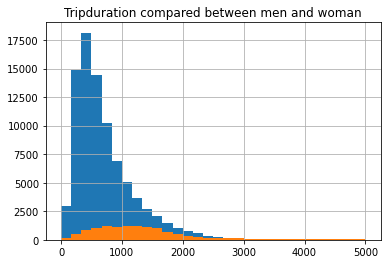

In [10]:
data_sub=df_citibike.loc[df_citibike['usertype'] == "Subscriber"]
data_nonsub=df_citibike.loc[df_citibike['usertype'] == "Customer"]

plt.title('Tripduration compared between men and woman')
data_sub['tripduration'].hist(bins=30,range=[0,5000])
data_nonsub['tripduration'].hist(bins=30,range=[0,5000])

<AxesSubplot:title={'center':'Tripduration compared between men and woman'}>

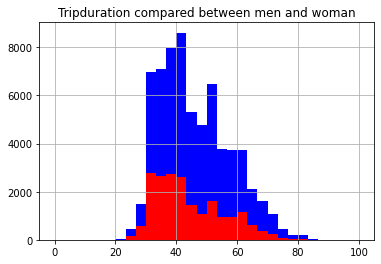

In [11]:
ageM = df_citibike.loc[df_citibike['gender'] == 1]
ageW = df_citibike.loc[df_citibike['gender'] == 2]
ageM = ageM['birth year']
ageW = ageW['birth year']
ageM = 2022-ageM
ageW = 2022-ageW

plt.title('Tripduration compared between men and woman')
ageM.hist(bins=30,range=[0,100],color="blue")
ageW.hist(bins=30,range=[0,100],color="red")

In [12]:
stations=df_citibike['start station name']
stations.head()

0    Washington Pl & Broadway
1             E 23 St & 1 Ave
2             W 25 St & 6 Ave
3     Allen St & Rivington St
4     E 55 St & Lexington Ave
Name: start station name, dtype: object

### Analysis Weather dataset

In [13]:
print(f"Weather DataFrame length: {len(df_weather)}")
print(f"Show first and last rows of Weather:")
df_weather.iloc[[1, -1]]

Weather DataFrame length: 24560
Show first and last rows of Weather:


,Unnamed: 0,Date,Max.TemperatureF,Mean.TemperatureF,Min.TemperatureF,Max.Dew.PointF,MeanDew.PointF,Min.DewpointF,Max.Humidity,Mean.Humidity,...,Min.VisibilityMiles,Max.Wind.SpeedMPH,Mean.Wind.SpeedMPH,Max.Gust.SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees.br...,city,season
1,2,1948-07-02,82,72.0,63,62,53,49,76,51,...,10.0,16,10,NaN,0.00,0.0,NaN,315<br />,New York City (USA),Summer
24559,24627,2015-12-31,52,48.0,43,46,38,27,93,71,...,5.0,20,12,25.0,0.06,7.0,Rain,317<br />,New York City (USA),Winter


In [14]:
print(f"\nWeather DataFrame head: {df_weather.head()}")


Weather DataFrame head:    Unnamed: 0        Date  Max.TemperatureF  Mean.TemperatureF  \
0           1  1948-07-01                84               78.0   
1           2  1948-07-02                82               72.0   
2           3  1948-07-03                78               71.0   
3           4  1948-07-04                84               76.0   
4           5  1948-07-05                93               82.0   

   Min.TemperatureF  Max.Dew.PointF  MeanDew.PointF  Min.DewpointF  \
0                72              71              65             58   
1                63              62              53             49   
2                64              66              58             53   
3                68              68              63             56   
4                70              74              69             65   

   Max.Humidity  Mean.Humidity  ...  Min.VisibilityMiles  Max.Wind.SpeedMPH  \
0            93             65  ...                  2.0                 16   

In [15]:
print("Weather DataFrame data types per column (auto import):")
print(f"{df_weather.dtypes}")

Weather DataFrame data types per column (auto import):
Unnamed: 0                     int64
Date                          object
Max.TemperatureF               int64
Mean.TemperatureF            float64
Min.TemperatureF               int64
Max.Dew.PointF                 int64
MeanDew.PointF                 int64
Min.DewpointF                  int64
Max.Humidity                   int64
Mean.Humidity                  int64
Min.Humidity                   int64
Max.Sea.Level.PressureIn     float64
Mean.Sea.Level.PressureIn    float64
Min.Sea.Level.PressureIn     float64
Max.VisibilityMiles          float64
Mean.VisibilityMiles         float64
Min.VisibilityMiles          float64
Max.Wind.SpeedMPH              int64
Mean.Wind.SpeedMPH             int64
Max.Gust.SpeedMPH            float64
PrecipitationIn               object
CloudCover                   float64
Events                        object
WindDirDegrees.br...          object
city                          object
season              

In [16]:
print("Convert column Date from object to datetime")
df_weather['Date'] = pd.to_datetime(df_weather['Date'], format='%Y-%m-%d')

Convert column Date from object to datetime


In [17]:
df_weather["Date"].iloc[[0, -1]]

0       1948-07-01
24559   2015-12-31
Name: Date, dtype: datetime64[ns]

In [18]:
print("Convert column PrecipitationIn from object to float")
df_weather['PrecipitationIn'] = pd.to_numeric(df_weather['PrecipitationIn'], errors='coerce')

Convert column PrecipitationIn from object to float


In [19]:
print("Convert column Events from object to string")
df_weather['Events'] = df_weather['Events'].astype('|S') 
df_weather["Events"].iloc[[0, -1]]

Convert column Events from object to string


0         b'Fog'
24559    b'Rain'
Name: Events, dtype: bytes208

In [20]:
print("Convert column WindDirDegrees.br... from object to integer and clean the data")

df_weather['WindDirectionDEG'] = df_weather['WindDirDegrees.br...'].str.removesuffix("<br />")
df_weather['WindDirectionDEG'] = df_weather['WindDirectionDEG'].astype('int')
df_weather["WindDirectionDEG"].iloc[[0, -1]]

Convert column WindDirDegrees.br... from object to integer and clean the data


0        264
24559    317
Name: WindDirectionDEG, dtype: int32

In [21]:
print("Converting Fahrenheit to Celsius")
def fahrenheit_to_celsius(fahrenheit):
    celsius = (fahrenheit - 32) * 5 / 9
    return celsius

df_weather["Max.TemperatureC"] = fahrenheit_to_celsius(df_weather["Max.TemperatureF"])
df_weather["Mean.TemperatureC"] = fahrenheit_to_celsius(df_weather["Mean.TemperatureF"])
df_weather["Min.TemperatureC"] = fahrenheit_to_celsius(df_weather["Min.TemperatureF"])
df_weather["Max.DewpointC"] = fahrenheit_to_celsius(df_weather["Max.Dew.PointF"])
df_weather["Mean.DewpointC"] = fahrenheit_to_celsius(df_weather["MeanDew.PointF"])
df_weather["Min.DewpointC"] = fahrenheit_to_celsius(df_weather["Min.DewpointF"])

#df_weather.rename(columns={"Max.TemperatureF": "Max.Temperature", "Mean.TemperatureF": "Mean.Temperature"})

print("Converting Miles to Kilometer")
def miles_to_km(miles):
    km = miles * 1.609344
    return km
df_weather["Min.VisibilityKM"] = miles_to_km(df_weather["Min.VisibilityMiles"])
df_weather["Max.VisibilityKM"] = miles_to_km(df_weather["Max.VisibilityMiles"])
df_weather["Mean.VisibilityKM"] = miles_to_km(df_weather["Mean.VisibilityMiles"])
df_weather["Max.Wind.SpeedKMH"] = miles_to_km(df_weather["Max.Wind.SpeedMPH"])
df_weather["Mean.Wind.SpeedKMH"] = miles_to_km(df_weather["Mean.Wind.SpeedMPH"])
df_weather["Max.Gust.SpeedKMH"] = miles_to_km(df_weather["Max.Gust.SpeedMPH"])

print("Converting inHg to hPa")
def inhg_to_hpa(inhg):
    hpa = inhg * 33.86389
    return hpa

df_weather["Max.Sea.Level.PressureHPA"] = inhg_to_hpa(df_weather["Max.Sea.Level.PressureIn"])
df_weather["Mean.Sea.Level.PressureHPA"] = inhg_to_hpa(df_weather["Mean.Sea.Level.PressureIn"])
df_weather["Min.Sea.Level.PressureHPA"] = inhg_to_hpa(df_weather["Min.Sea.Level.PressureIn"])

print("Converting CloudCover from eighths to percent")
def eighths_to_percent(eighths):
    percent = eighths / 8 * 100
    return percent

df_weather["CloudCoverPERCENT"] = eighths_to_percent(df_weather["CloudCover"])

print("Converting Inch to Millimeter")
def inch_to_mm(inch):
    mm = inch * 25.4
    return mm

df_weather["PrecipitationMM"] = inch_to_mm(df_weather["PrecipitationIn"])




Converting Fahrenheit to Celsius
Converting Miles to Kilometer
Converting inHg to hPa
Converting CloudCover from eighths to percent
Converting Inch to Millimeter


In [22]:
df_weather.drop(['Max.TemperatureF', 'Mean.TemperatureF', 'Min.TemperatureF', 'Max.Dew.PointF', 'MeanDew.PointF', 'Min.DewpointF', 'Min.VisibilityMiles', 'Max.VisibilityMiles', 'Mean.VisibilityMiles', 'Max.Wind.SpeedMPH', 'Mean.Wind.SpeedMPH', 'Max.Gust.SpeedMPH', 'Max.Sea.Level.PressureIn', 'Mean.Sea.Level.PressureIn', 'Min.Sea.Level.PressureIn', 'CloudCover', 'WindDirDegrees.br...'], axis=1, inplace=True)

In [23]:
print("Checking for categorial values in the columns")
for column in df_weather.columns:
    print(f"Column {column} has {df_weather[column].value_counts().count()} distinct values")

Checking for categorial values in the columns
Column Unnamed: 0 has 24560 distinct values
Column Date has 24560 distinct values
Column Max.Humidity has 68 distinct values
Column Mean.Humidity has 81 distinct values
Column Min.Humidity has 91 distinct values
Column PrecipitationIn has 364 distinct values
Column Events has 17 distinct values
Column city has 1 distinct values
Column season has 4 distinct values
Column WindDirectionDEG has 361 distinct values
Column Max.TemperatureC has 95 distinct values
Column Mean.TemperatureC has 87 distinct values
Column Min.TemperatureC has 82 distinct values
Column Max.DewpointC has 90 distinct values
Column Mean.DewpointC has 93 distinct values
Column Min.DewpointC has 99 distinct values
Column Min.VisibilityKM has 13 distinct values
Column Max.VisibilityKM has 13 distinct values
Column Mean.VisibilityKM has 21 distinct values
Column Max.Wind.SpeedKMH has 54 distinct values
Column Mean.Wind.SpeedKMH has 38 distinct values
Column Max.Gust.SpeedKMH h

In [24]:
df_weather['season'].value_counts().count()

4

In [25]:
df_weather['season'].value_counts()

Summer    6364
Spring    6178
Autumn    6052
Winter    5966
Name: season, dtype: int64

In [26]:
df_weather['season'] = df_weather['season'].astype('category')

In [27]:
df_weather['Events'].value_counts().count()

17

In [28]:
df_weather['Events'].value_counts()

b'nan'                           12839
b'Rain'                           3514
b'Fog-Rain'                       3276
b'Fog'                            1937
b'Snow'                            694
b'Fog-Rain-Thunderstorm'           668
b'Rain-Thunderstorm'               648
b'Fog-Rain-Snow'                   378
b'Rain-Snow'                       288
b'Fog-Snow'                        274
b'Thunderstorm'                     19
b'Fog-Rain-Snow-Thunderstorm'       11
b'Fog-Thunderstorm'                  8
b'Rain-Snow-Thunderstorm'            3
b'Fog-Snow-Thunderstorm'             1
b'Fog-Rain-Hail-Thunderstorm'        1
b'Tornado'                           1
Name: Events, dtype: int64

In [29]:
df_weather['city'].value_counts().count()

1

In [30]:
df_weather['city'].value_counts()

New York City (USA)    24560
Name: city, dtype: int64

In [31]:
df_weather['city'] = df_weather['city'].astype('category')

In [32]:
df_weather['CloudCoverPERCENT'].value_counts()

0.0      6738
100.0    2200
75.0     2195
87.5     2157
62.5     2132
50.0     1987
37.5     1755
25.0     1498
12.5     1117
Name: CloudCoverPERCENT, dtype: int64

In [33]:
print("Weather data types after cleaning and conversion:")
print(f"{df_weather.dtypes}")

Weather data types after cleaning and conversion:
Unnamed: 0                             int64
Date                          datetime64[ns]
Max.Humidity                           int64
Mean.Humidity                          int64
Min.Humidity                           int64
PrecipitationIn                      float64
Events                                  |S26
city                                category
season                              category
WindDirectionDEG                       int32
Max.TemperatureC                     float64
Mean.TemperatureC                    float64
Min.TemperatureC                     float64
Max.DewpointC                        float64
Mean.DewpointC                       float64
Min.DewpointC                        float64
Min.VisibilityKM                     float64
Max.VisibilityKM                     float64
Mean.VisibilityKM                    float64
Max.Wind.SpeedKMH                    float64
Mean.Wind.SpeedKMH                   float64
Max.G

In [34]:
print("Check for missing values in Weaterh:")
df_weather.isna().sum()

Check for missing values in Weaterh:


Unnamed: 0                        0
Date                              0
Max.Humidity                      0
Mean.Humidity                     0
Min.Humidity                      0
PrecipitationIn                 525
Events                            0
city                              0
season                            0
WindDirectionDEG                  0
Max.TemperatureC                  0
Mean.TemperatureC                 2
Min.TemperatureC                  0
Max.DewpointC                     0
Mean.DewpointC                    0
Min.DewpointC                     0
Min.VisibilityKM                 15
Max.VisibilityKM                 15
Mean.VisibilityKM                15
Max.Wind.SpeedKMH                 0
Mean.Wind.SpeedKMH                0
Max.Gust.SpeedKMH             15538
Max.Sea.Level.PressureHPA         0
Mean.Sea.Level.PressureHPA        0
Min.Sea.Level.PressureHPA         0
CloudCoverPERCENT              2781
PrecipitationMM                 525
dtype: int64

In [35]:
print(f"Show first and last rows of Weather - after cleaning and conversion:")
df_weather.iloc[[0, -1]]

Show first and last rows of Weather - after cleaning and conversion:


,Unnamed: 0,Date,Max.Humidity,Mean.Humidity,Min.Humidity,PrecipitationIn,Events,city,season,WindDirectionDEG,...,Max.VisibilityKM,Mean.VisibilityKM,Max.Wind.SpeedKMH,Mean.Wind.SpeedKMH,Max.Gust.SpeedKMH,Max.Sea.Level.PressureHPA,Mean.Sea.Level.PressureHPA,Min.Sea.Level.PressureHPA,CloudCoverPERCENT,PrecipitationMM
0,1,1948-07-01,93,65,46,0.00,b'Fog',New York City (USA),Summer,264,...,16.09344,11.265408,25.749504,12.874752,NaN,1018.287172,1016.255339,1015.239422,0.0,0.000
24559,24627,2015-12-31,93,71,49,0.06,b'Rain',New York City (USA),Winter,317,...,16.09344,16.093440,32.186880,19.312128,40.2336,1019.303089,1017.948533,1016.255339,87.5,1.524


In [36]:
print(f"Citibike DataFrame length: {len(df_weather)}")
print(f"Show first and last rows of Citibike:")
df_citibike.iloc[[1, -1]]

Citibike DataFrame length: 24560
Show first and last rows of Citibike:


,Unnamed: 0,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
1,1043212,1542,4/13/2015 08:07:06,4/13/2015 08:32:48,545,E 23 St & 1 Ave,40.736502,-73.978095,415,Pearl St & Hanover Square,40.704718,-74.009260,19785,Subscriber,1957.0,1
99379,8672150,418,11/14/2015 15:39:48,11/14/2015 15:46:46,317,E 6 St & Avenue B,40.724537,-73.981854,301,E 2 St & Avenue B,40.722174,-73.983688,19774,Subscriber,1961.0,1


In [37]:
print("Convert column Date from object to datetime")
df_citibike['starttime'] = pd.to_datetime(df_citibike['starttime'], format="%m/%d/%Y %H:%M:%S", errors="coerce").fillna(pd.to_datetime(df_citibike['starttime'], format="%m/%d/%Y %H:%M", errors="coerce"))
df_citibike['stoptime']  = pd.to_datetime(df_citibike['stoptime' ], format="%m/%d/%Y %H:%M:%S", errors="coerce").fillna(pd.to_datetime(df_citibike['stoptime' ], format="%m/%d/%Y %H:%M", errors="coerce"))


Convert column Date from object to datetime


In [38]:
print("Check for missing values in Citibike:")
df_citibike.isna().sum()

Check for missing values in Citibike:


Unnamed: 0                     0
tripduration                   0
starttime                      0
stoptime                       0
start station id               0
start station name             0
start station latitude         0
start station longitude        0
end station id                 0
end station name               0
end station latitude           0
end station longitude          0
bikeid                         0
usertype                       0
birth year                 13079
gender                         0
dtype: int64

In [39]:
print("Checking for categorial values in the columns")
for column in df_citibike.columns:
    print(f"Column {column} has {df_citibike[column].value_counts().count()} distinct values")

Checking for categorial values in the columns
Column Unnamed: 0 has 99380 distinct values
Column tripduration has 4294 distinct values
Column starttime has 97028 distinct values
Column stoptime has 97046 distinct values
Column start station id has 485 distinct values
Column start station name has 494 distinct values
Column start station latitude has 507 distinct values
Column start station longitude has 507 distinct values
Column end station id has 488 distinct values
Column end station name has 497 distinct values
Column end station latitude has 510 distinct values
Column end station longitude has 510 distinct values
Column bikeid has 8348 distinct values
Column usertype has 2 distinct values
Column birth year has 77 distinct values
Column gender has 3 distinct values
